   ## Baby Names Project

# PART ONE

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
#the regular package imports

In [457]:
data = pd.read_clipboard() #reads data which has been copied to the clipboard, which in this case is the birth table 
data.tail(10)

,birth,Male,Female,Total
129,2009,"2,119,417","2,023,472","4,142,889"
130,2010,"2,052,693","1,958,903","4,011,596"
131,2011,"2,029,287","1,935,688","3,964,975"
132,2012,"2,026,765","1,937,107","3,963,872"
133,2013,"2,017,811","1,924,917","3,942,728"
134,2014,"2,045,761","1,953,009","3,998,770"
135,2015,"2,040,117","1,946,978","3,987,095"
136,2016,"2,020,441","1,930,885","3,951,326"
137,2017,"1,972,095","1,882,771","3,854,866"
138,2018,"1,928,871","1,846,101","3,774,972"


In [458]:
male = data['Male']
female = data['Female']
year = data['birth']
for s in range(len(male)):
    male[s] = male[s].replace(',', '')
for s in range(len(female)):
    female[s] = female[s].replace(',', '')

#the data copied from the table is taken in string format. Commas need to be removed to convert them to numeric format


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [459]:
for s in range(len(male)):
    male[s] = int(male[s])
for s in range(len(male)):
    female[s] = int(female[s])
for s in range(len(year)):
    year[s] = int(year[s])
#converting individual string values into numeric format.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


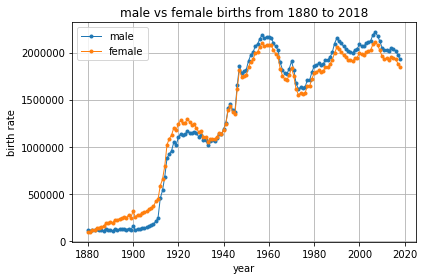

In [504]:
fig, ax =plt.subplots()
width = 0.5
ax.plot(year, male,linewidth=1, label='male',marker='.') #first plotted line which plots male births vs year
ax.plot(year,female,linewidth=1, label='female',marker='.') #second line which plots female births vs year
plt.title('male vs female births from 1880 to 2018')
plt.xlabel('year')
plt.ylabel('birth rate')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.grid(True)
plt.tight_layout()
ax.legend()
plt.show()

In [453]:
from pandas import read_csv
columns = ['name','sex','births']
names = []
years = list(range(1881,2011))
for year in years:
    path = 'names/yob{0:d}.txt'.format(year)
    frame = pd.read_csv(path,names=columns)
    frame['year']=year
    names.append(frame)

#to read all the data from each individual file from1881 through 2011 we build a single large frame called names
#the data is then concatenated to get one individual data frame which will be done in the next line of code

# PART TWO

In [123]:
names_df = pd.concat(names, ignore_index= True)
#the individual indexes for the entries are ignored because once the data is aggregated the indexes are renumbered.

In [124]:
female_names = names_df[names_df['sex']=='F']
male_names = names_df[names_df['sex']=='M']
#subsets of the names dataframe segregated on the basis of gender

In [134]:
male_names.head()

,name,sex,births,year
938,John,M,8769,1881
939,William,M,8524,1881
940,James,M,5442,1881
941,George,M,4664,1881
942,Charles,M,4637,1881


In [178]:
from collections import Counter
import string #packages imported in order to do the individual letter counts
countmale = Counter()
countfemale = Counter()#two separate counters assigned to do letter counts for each gender
for words in male_names['name']: #loops through every name in the male dataframe
    for letters in words.lower(): #removes case bias so that upper and lower case are considered as the same letter
        countmale[letters]+=1 #increments the counter everytime an instance of a letter is encountered
for words in female_names['name']:
    for letters in words.lower():
        countfemale[letters]+=1 #same process done for female names
a= countmale #counter assigned to a variable
b= countfemale
a1=sorted(a.items(), key=lambda x: x[0]) #the letter counts are arranged in alphabetical order
b1=sorted(b.items(),key=lambda x:x[0])

In [182]:
malecountfinal = {}
femalecountfinal = {}
for x,y in a1:
    malecountfinal[x]=y #since the above sort results in a list of tuples they are again assigned to a dictionary
for x,y in b1:          #this makes visualization on matplotlib a little easier
    femalecountfinal[x]=y

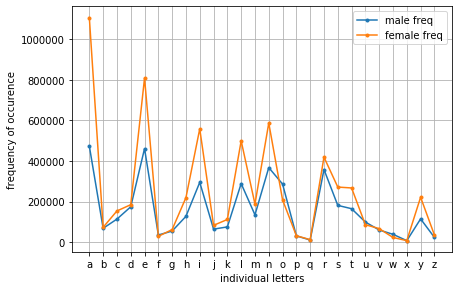

In [502]:
plt.grid(True)
plt.tight_layout()
plt.xlabel('individual letters')
plt.ylabel('frequency of occurence')
plt.plot(list(malecountfinal.keys()),list(malecountfinal.values()),label='male freq',marker='.')
plt.plot(list(femalecountfinal.keys()),list(femalecountfinal.values()),label = 'female freq',marker='.')
plt.legend()
plt.show()
#individual lines are plotted for letter frequences for male and female names

# PART THREE

In [211]:
female_names.head()

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [249]:
year_1880s = female_names[(female_names['year']>1880) & (female_names['year']<1890)]
year_1940s = female_names[(female_names['year']>1939)&(female_names['year']<1950)]
year_1990s = female_names[(female_names['year']>1989)&(female_names['year']<2000)]
#subsets of the original female_names dataframe made on the basis of the 3 decades 1880s, 1940s, 1990s.

In [267]:
count80s = Counter()
count40s = Counter()
count90s = Counter()
for words in year_1880s['name']:
    for letters in words.lower():
        count80s[letters]+=1
for words in year_1940s['name']:
    for letters in words.lower():
        count40s[letters]+=1
for words in year_1990s['name']:
    for letters in words.lower():
        count90s[letters]+=1       #same counter procedure followed each individual dataframe 
d = count80s
e = count40s
f = count90s
d1 = sorted(d.items(), key=lambda x: x[0])
e1 = sorted(e.items(), key=lambda x: x[0])
f1 = sorted(f.items(), key=lambda x: x[0]) #sorting in alphabetical order
final80s = {}
final40s = {}
final90s = {}
for a,b in d1:
    final80s[a]=b
for a,b in e1:
    final40s[a]=b
for a,b in f1:
    final90s[a]=b   #asigning final values to dictionaries

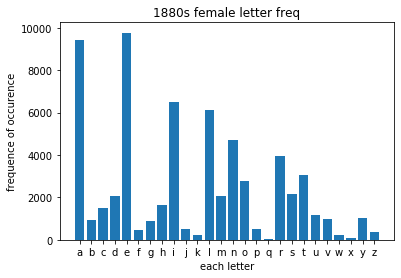

In [493]:
plt.bar(list(final80s.keys()),list(final80s.values()))
plt.title('1880s female letter freq')
plt.xlabel('each letter')
plt.ylabel('frequence of occurence')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
#data plotted for female letter frequencies in that particular decade

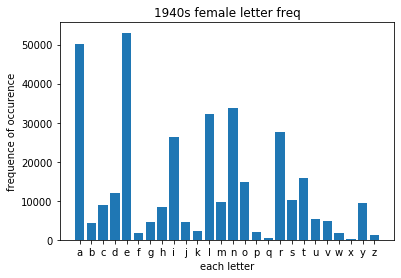

In [492]:
plt.bar(list(final40s.keys()),list(final40s.values()),label='1880s female letter freq')
plt.title('1940s female letter freq')
plt.xlabel('each letter')
plt.ylabel('frequence of occurence')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

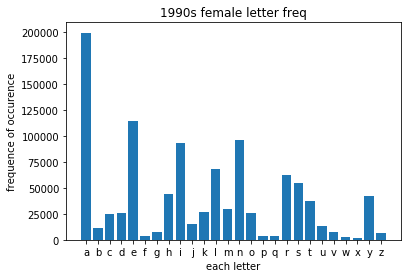

In [491]:
plt.bar(list(final90s.keys()),list(final90s.values()),label='1880s female letter freq')
plt.title('1990s female letter freq')
plt.xlabel('each letter')
plt.ylabel('frequence of occurence')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

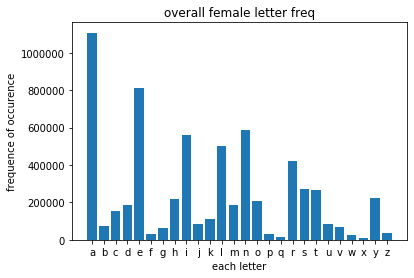

In [490]:
plt.bar(list(femalecountfinal.keys()),list(femalecountfinal.values()))
plt.title('overall female letter freq')
plt.xlabel('each letter')
plt.ylabel('frequence of occurence')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

# PART FOUR

In [289]:
decade_1940s.head()

,name,sex,births,year
364264,Mary,F,56203,1940
364265,Barbara,F,36730,1940
364266,Patricia,F,32658,1940
364267,Judith,F,22376,1940
364268,Betty,F,22067,1940


In [281]:
decade_1930s = names_df[(names_df['year']>1929)&(names_df['year']<1940)]
decade_1940s = names_df[(names_df['year']>1939)&(names_df['year']<1950)]
decade_1950s = names_df[(names_df['year']>1949)&(names_df['year']<1960)]
# data for the three decades separated from the original names_df dataframe

In [393]:
random1 = decade_1940s.sample(n=100)
random2 = decade_1950s.sample(n=100)
random3 = decade_1930s.sample(n=100)
#getting three random samples of 100 members from each dataframe

In [429]:
variance_dict = {}
for word in random1['name']:
    birth_array = np.array(decade_1940s['births'][decade_1940s['name']==word]) 
 #the above command fetches the different birth rates for each occurence of the word over the decade being examined.
    variance_dict[word]=np.var(birth_array)
#the variances are then assigned to each of the 100 names over the decade and put into a dictionary

In [395]:
sorted_d = dict(sorted(variance_dict.items(), key=lambda kv: kv[1], reverse=True))
#this sorts the dictionary from the highest to lowest variance

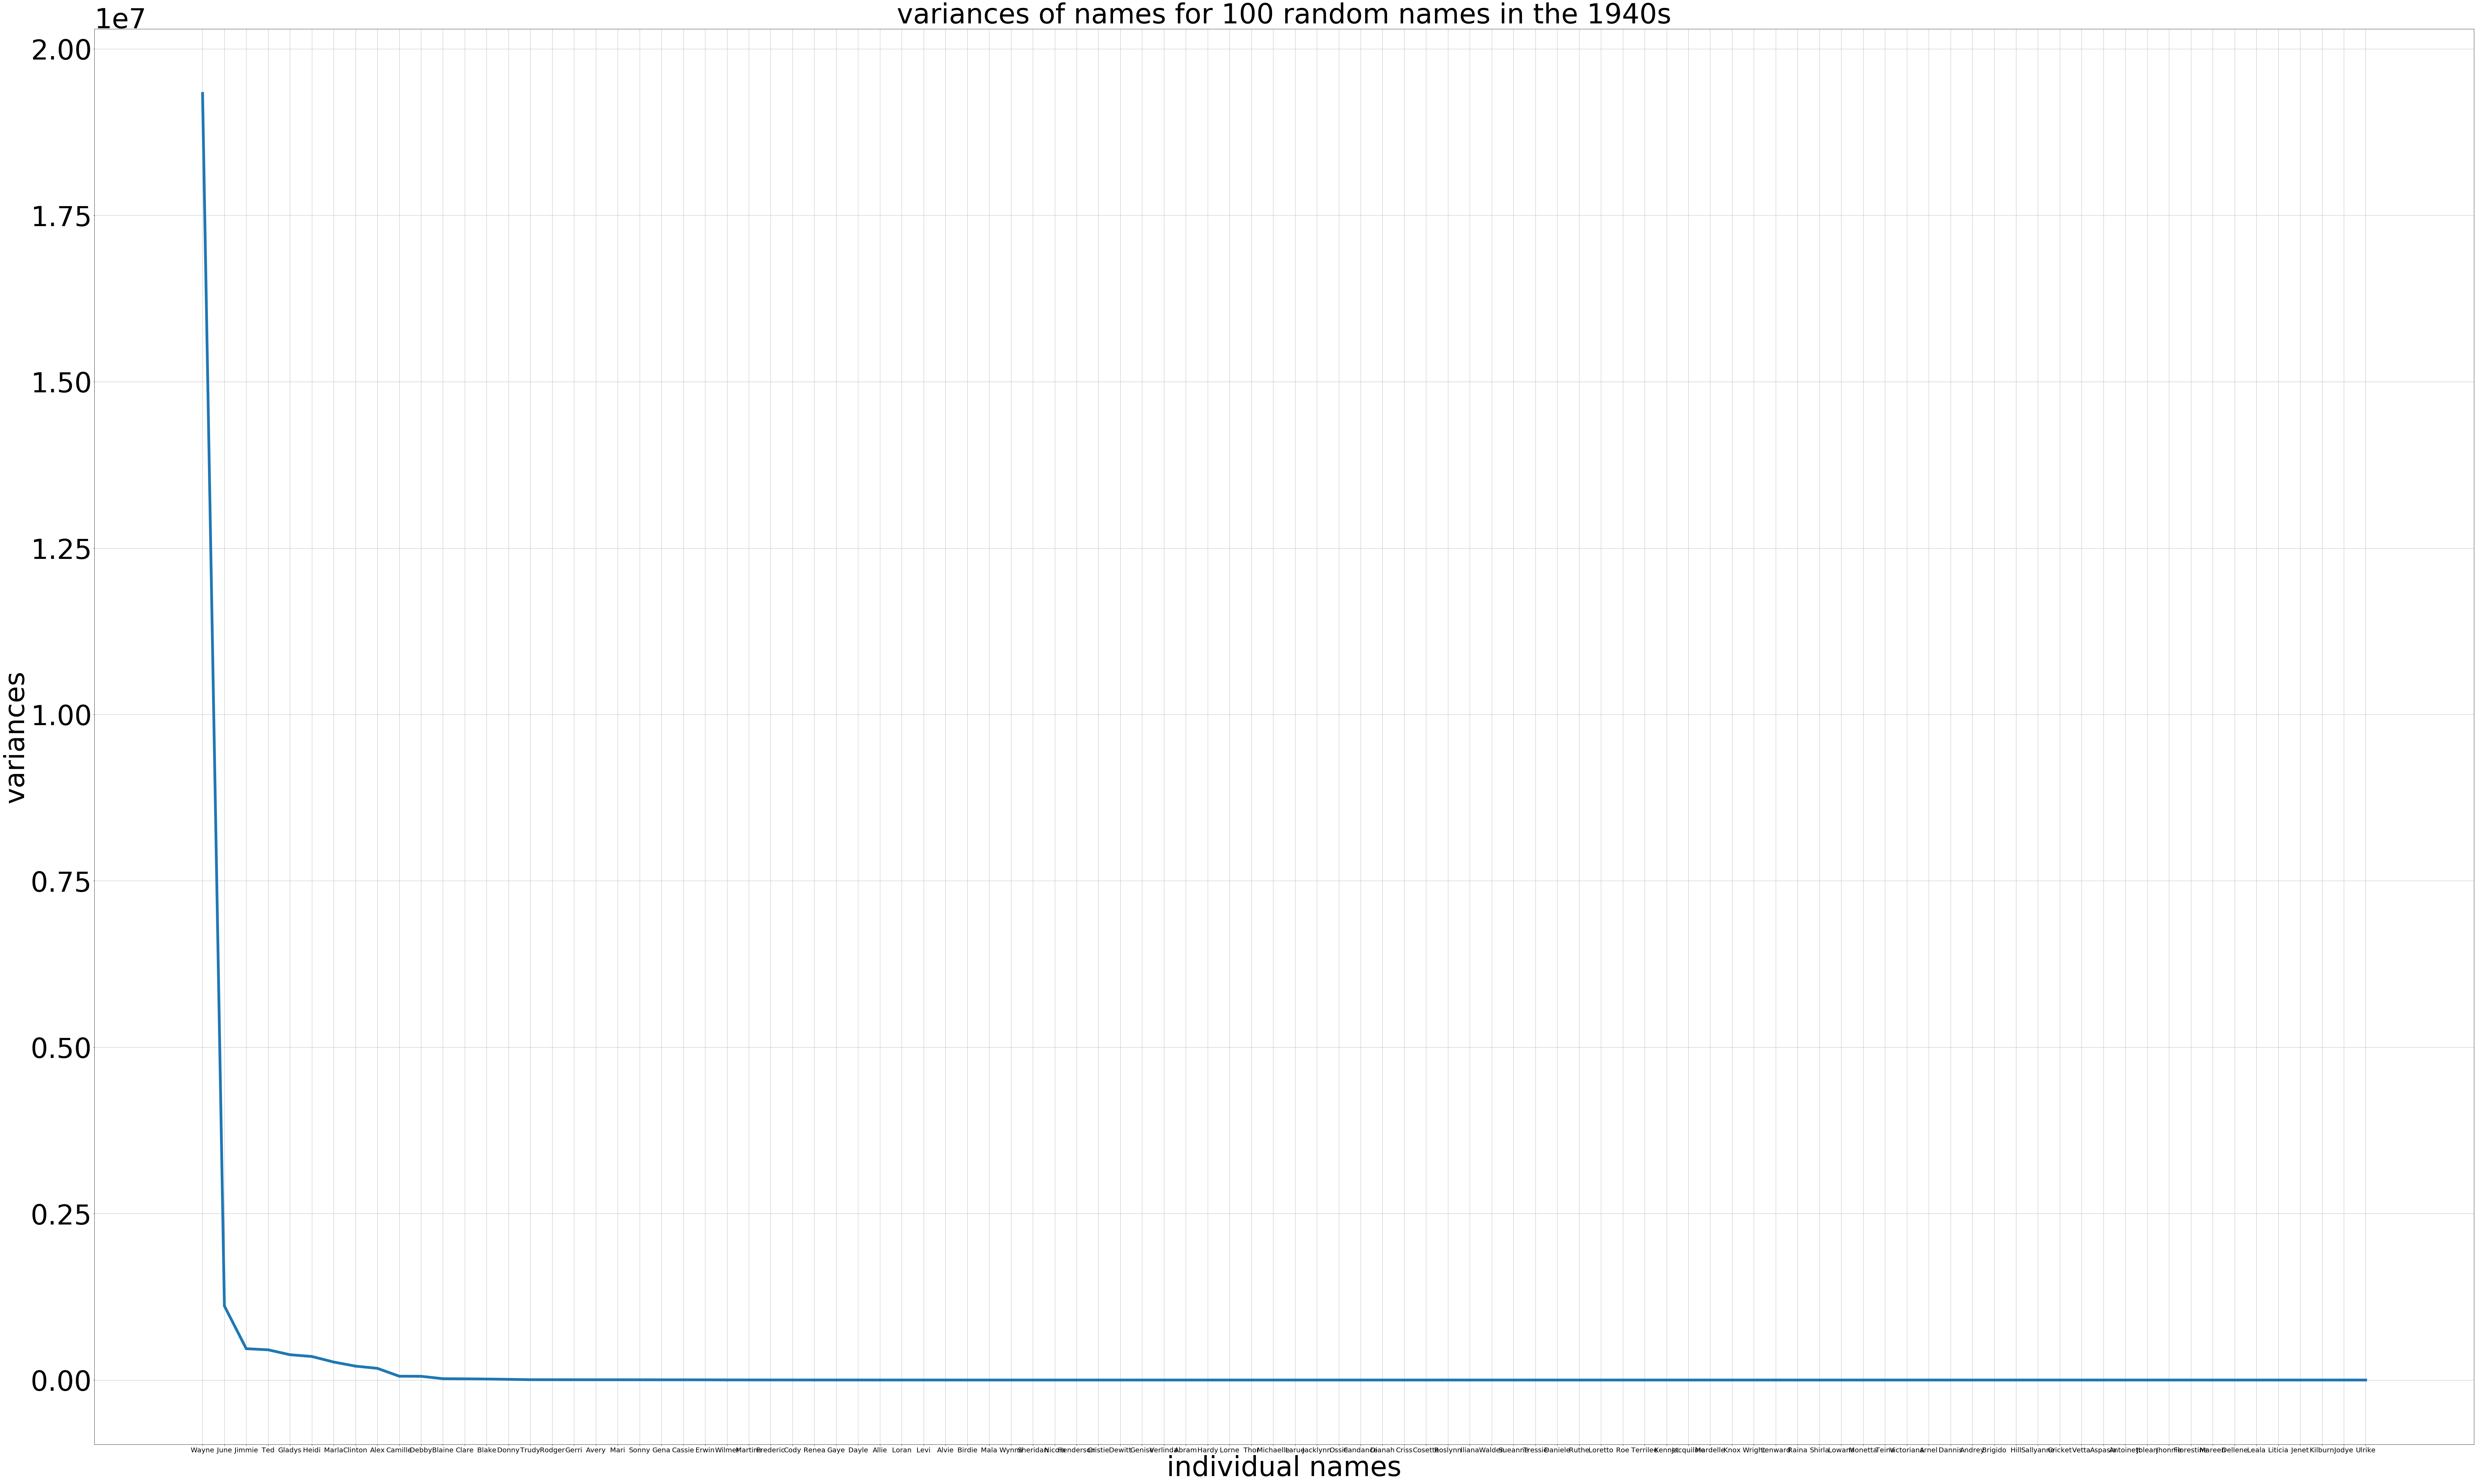

In [487]:
plt.figure(figsize=(100,60))
plt.title('variances of names for 100 random names in the 1940s',fontsize=80)
plt.xlabel('individual names',fontsize=80)
plt.ylabel('variances',fontsize=80)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=80)
plt.plot(list(sorted_d2.keys()),list(sorted_d2.values()),linewidth=8, marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()
#plotting the variance for each of the 100 names

In [397]:
variance_dict2 = {}
for word in random2['name']:
    birth_array = np.array(decade_1950s['births'][decade_1950s['name']==word])
    variance_dict2[word]=np.var(birth_array)
    #same procedure followed for the previous decade dataframe

In [398]:
sorted_d2 = dict(sorted(variance_dict2.items(), key=lambda kv: kv[1], reverse=True))

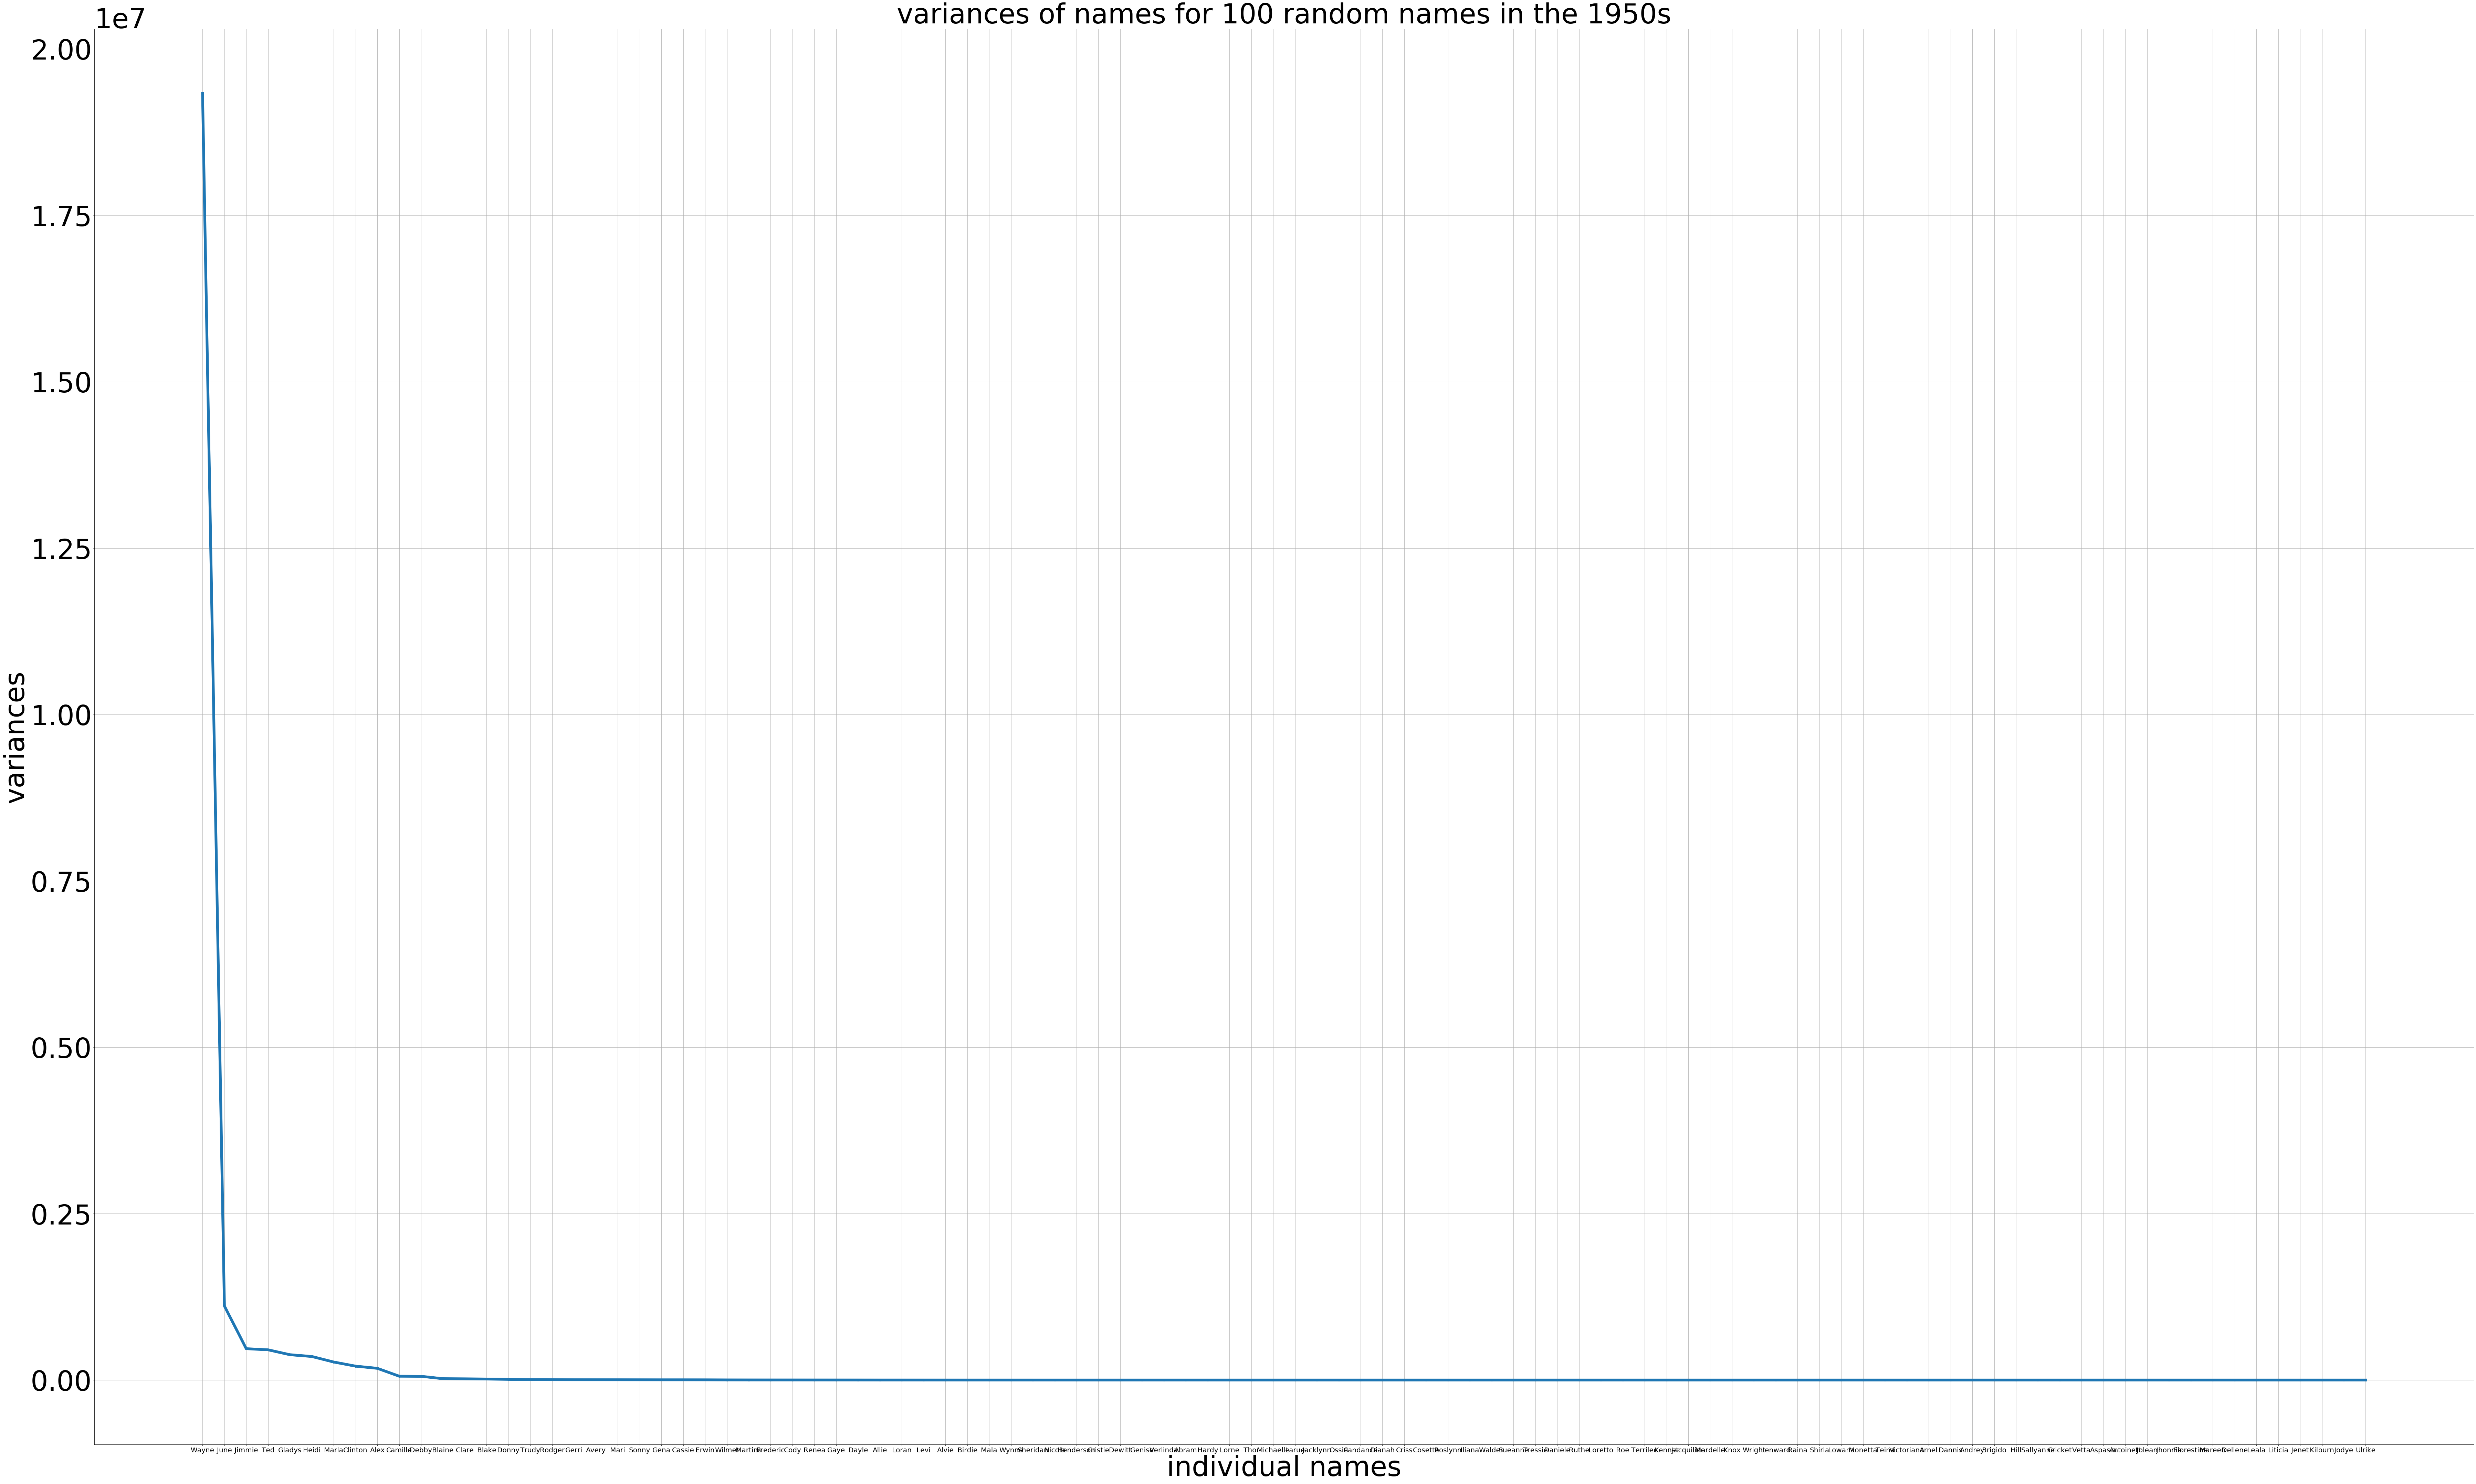

In [486]:
plt.figure(figsize=(100,60))
plt.title('variances of names for 100 random names in the 1950s',fontsize=80)
plt.xlabel('individual names',fontsize=80)
plt.ylabel('variances',fontsize=80)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=80)
plt.plot(list(sorted_d2.keys()),list(sorted_d2.values()),linewidth=8, marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()

In [400]:
variance_dict3 = {}
for word in random3['name']:
    birth_array = np.array(decade_1930s['births'][decade_1930s['name']==word])
    variance_dict3[word]=np.var(birth_array)
    #same procedure followed for this decade as well. 

In [401]:
sorted_d3 = dict(sorted(variance_dict3.items(), key=lambda kv: kv[1], reverse=True))

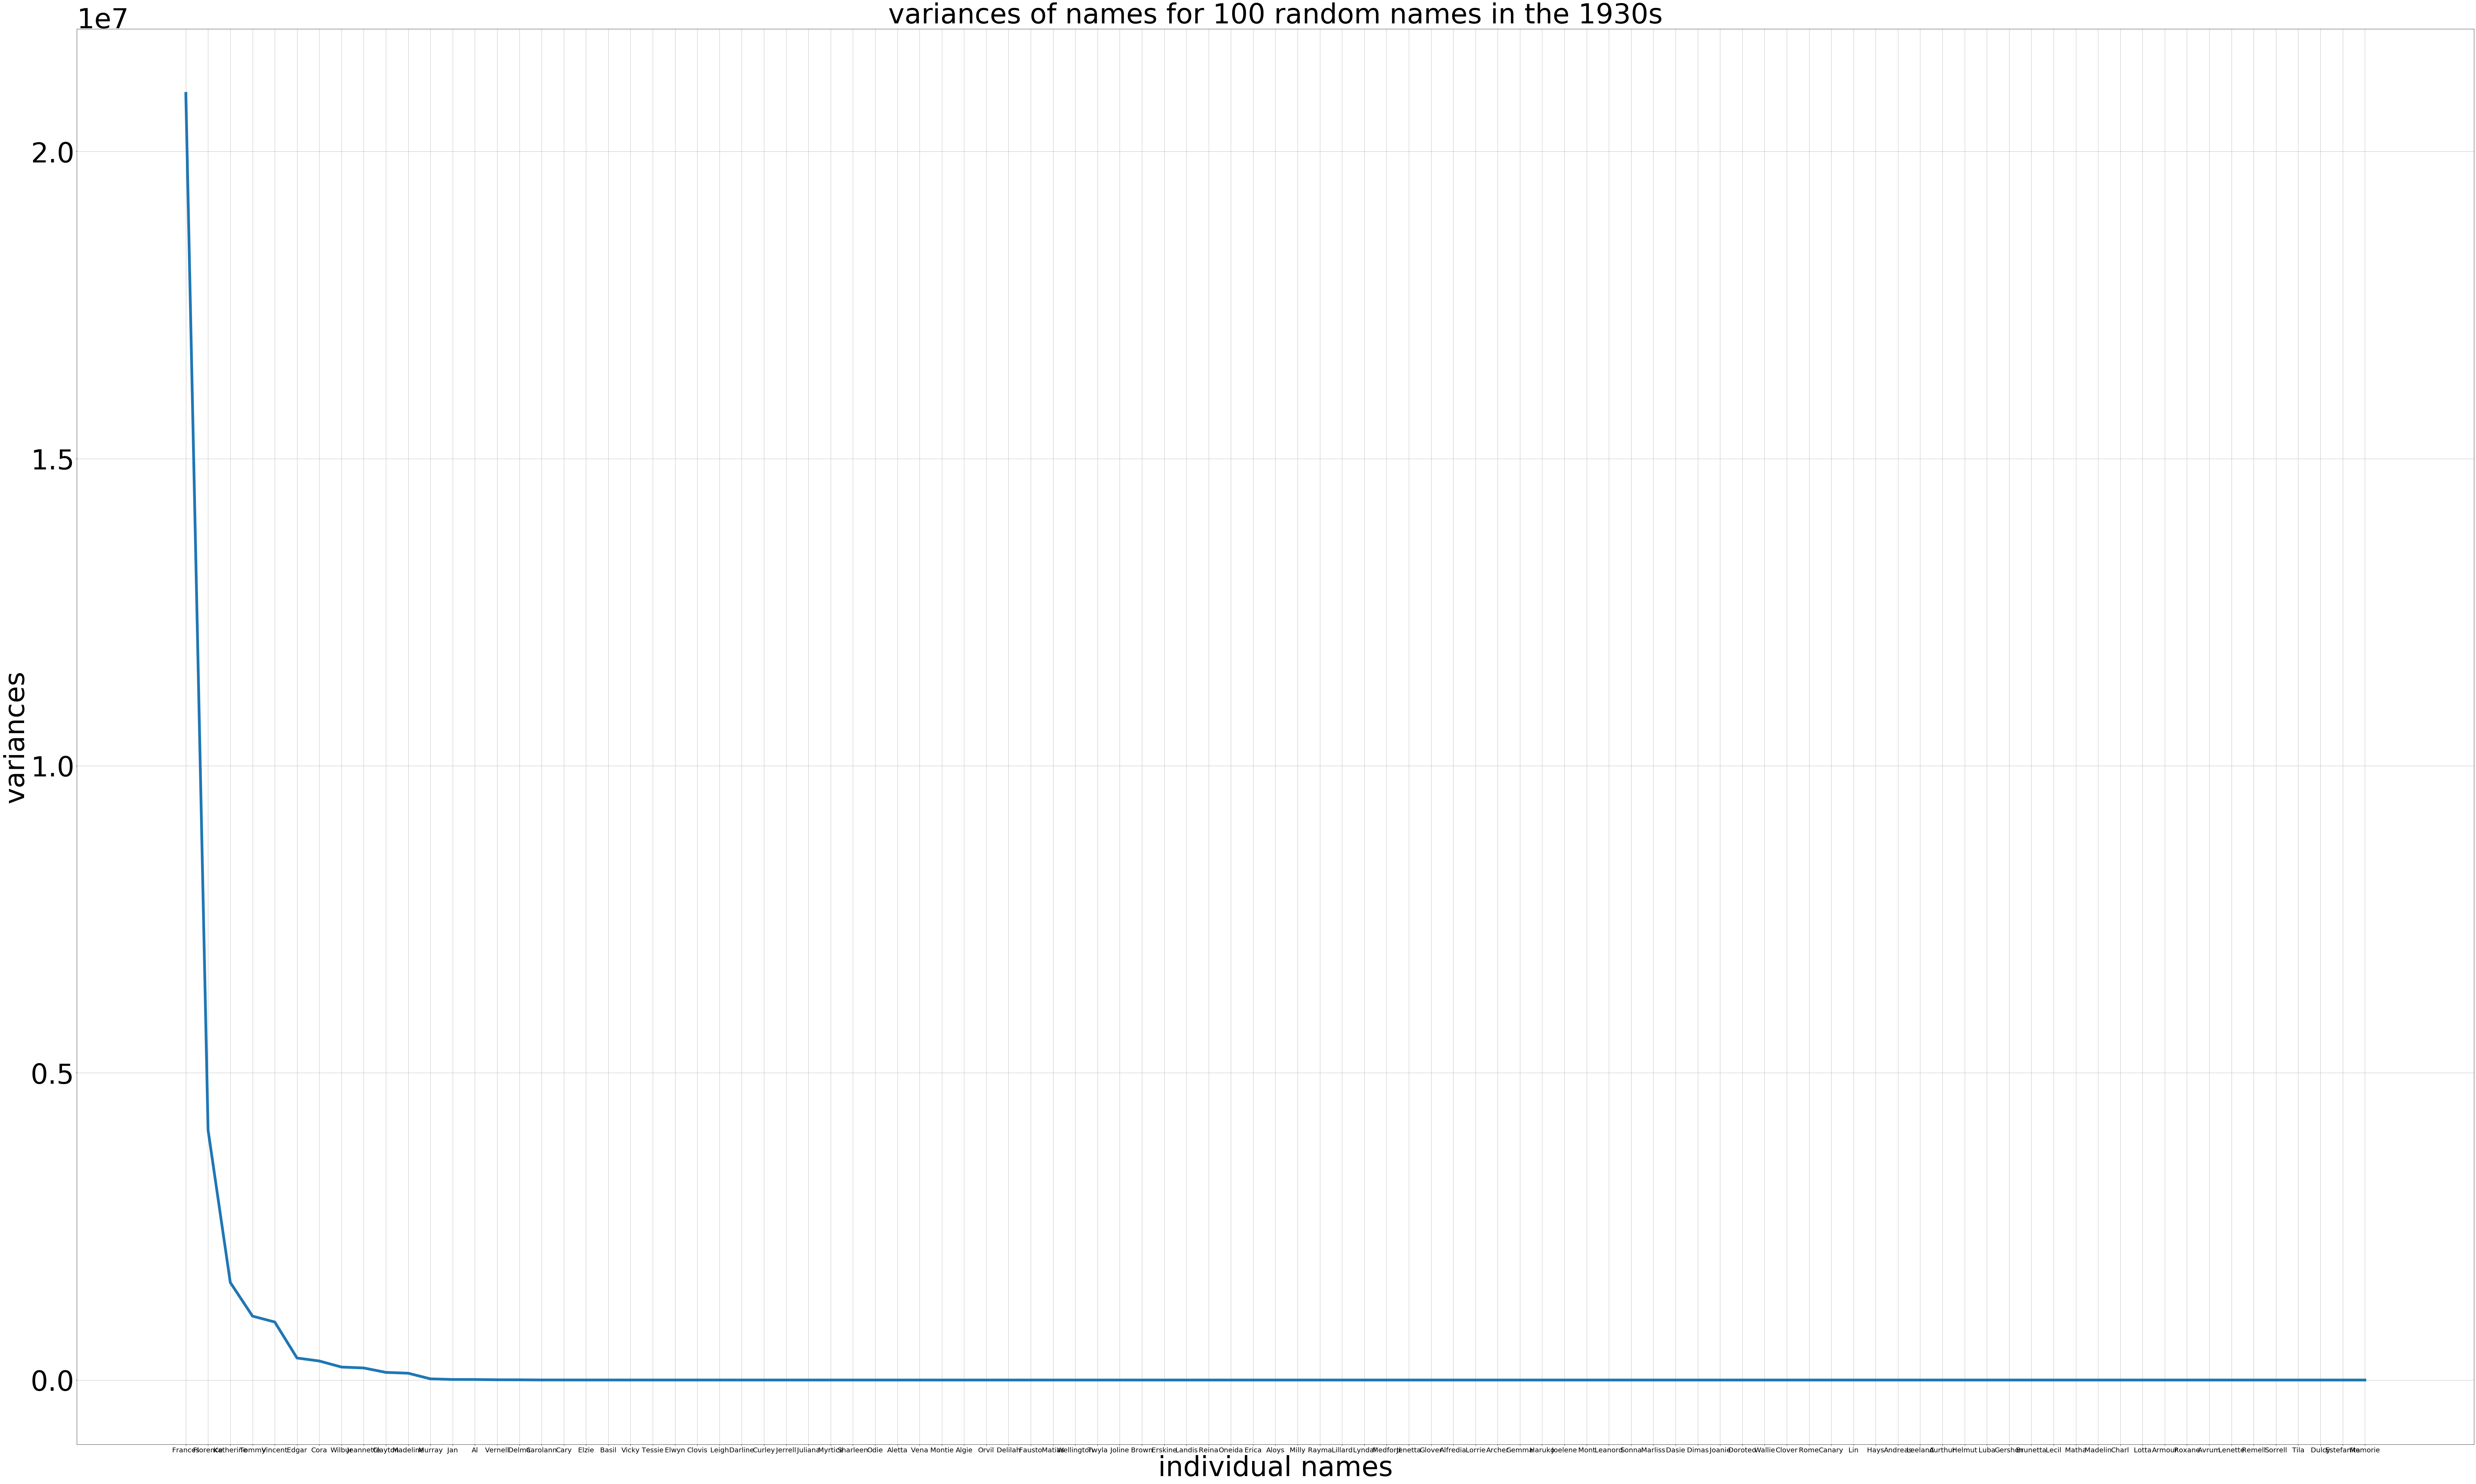

In [480]:
plt.figure(figsize=(100,60))
plt.title('variances of names for 100 random names in the 1930s',fontsize=80)
plt.xlabel('individual names',fontsize=80)
plt.ylabel('variances',fontsize=80)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=80)
plt.plot(list(sorted_d3.keys()),list(sorted_d3.values()),linewidth=8, marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()

#### From the indivdual plots for the 3 different decades the same trend can be observed. There are a few names that have a large variance in popularity while most of the other names maintain stability in popularity. 
#### The large variances might be explained by the cultural influences at the time which saw the popularity of the name rise for a period of time before it evened out again. The cultural influence could be a political figure or a movie character with that name who rose to prominence at that specific time period.
#### This trend was observed recently after the tv show game of thrones became popular and saw the baby name 'Arya' become the most popular baby name for a while. While there are these instances observed in the plots, the variance for the other names were closer to zero which meant there wasn't a dip or a spike in popularity for the decade. 
#### Therefore it can be concluded that most names maintain a stable popularity through a decade while a few names have massive increases in popularity that eventualy dwindle out.